In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_excel("lophoc.xlsx")
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,nghỉ
1,ốm,mưa,nghỉ
2,ốm,nắng,nghỉ
3,ốm,u ám,học
4,tốt,u ám,học
5,tốt,mưa,học
6,tốt,nắng,nghỉ


In [30]:
from sklearn import preprocessing

encHealth = preprocessing.LabelEncoder()
df['Sức khỏe'] = encHealth.fit_transform(df['Sức khỏe'])

encWeather = preprocessing.LabelEncoder()
df['Thời tiết'] = encWeather.fit_transform(df['Thời tiết'])

encResult = preprocessing.LabelEncoder()
df['Kết quả'] = encResult.fit_transform(df['Kết quả'])

df

,Sức khỏe,Thời tiết,Kết quả
0,1,2,1
1,1,0,1
2,1,1,1
3,1,2,0
4,0,2,0
5,0,0,0
6,0,1,1


In [31]:
#Tập dữ liệu Input(đặc trưng) và Output(mục tiêu)

feature_cols = ['Sức khỏe','Thời tiết']
x = df[feature_cols].values
y = df[['Kết quả']].values

In [32]:
#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=32)

In [33]:
modelDT = DecisionTreeClassifier(criterion= "entropy", max_depth=3)
modelDT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
modelDT = modelDT.fit(X_train,y_train)
modelDT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4, 0.8333333333333334, 'Sức khỏe <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Thời tiết <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]')]

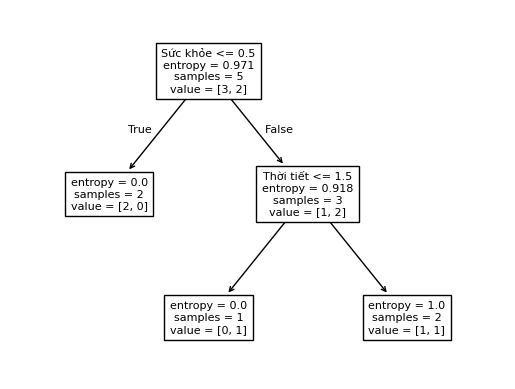

In [35]:
from sklearn.tree import plot_tree
plot_tree(modelDT, feature_names = feature_cols, fontsize=8)

In [36]:
y_test_pred = modelDT.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_test_pred))

Accuracy: 0.5


In [37]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[0, 0],
       [1, 1]])

In [38]:
#Tính TPR, FNR, FPR, TNR
#Vẽ AUC & ROC
#Precision, Recall, F1


<h1>Xây dựng chương trình dự báo</h1>
<p> Người dùng nhập từ bàn phím sức khỏe và thời tiết. Hãy dữ báo trạng thái lớp học </p>
<p> Ví dụ :["Ốm", "Nắng"] -> Kết quả = ?</p>

In [39]:
import numpy as np
health = 'ốm'
health_scaled = encHealth.transform([health])

weather = 'u ám'
weather_scaled = encWeather.transform([weather])

feature_sample = np.array([health_scaled[0], weather_scaled[0]])

y_sample_pred = modelDT.predict([feature_sample])
y_sample_pred

array([0])